<div style="background-color: #ffffcc; color: #333333; padding: 15px; border-radius: 8px; font-size: 18px;">
    <h1 style="text-align: center; color: #1a73e8;">TP1: Régression</h1>
    <p style="text-align: center; font-size: 16px;">Étudiant: Papa Abdourahmane CISSE 👨‍🎓</p>
</div>




In [4]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot


In [5]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

<div style="background-color: #d2b48c; color: #ffffff; padding: 15px; border-radius: 8px; font-size: 18px;">
    <h1 style="text-align: center; color: #ffffff;">Exercice 1:</h1>
    <p style="font-size: 16px;">Dans la cellule précédente, veuillez analyser les variables explicatives : que constatez-vous entre le jeu de train et le jeu de test ?</p>
</div>


In [15]:
data=pd.read_csv("billets.csv",sep=";")
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


# Modeling

In [17]:
data_model = data[data['margin_low'].notnull()]

In [18]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

# Train / Test split

In [20]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


# 1. Vérifier la Standardisation du Jeu de Test

In [21]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

# 2.Comparer la Distribution des Variables Explicatives

C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_df[col], label='Train', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[col], label='Test', shade=True)


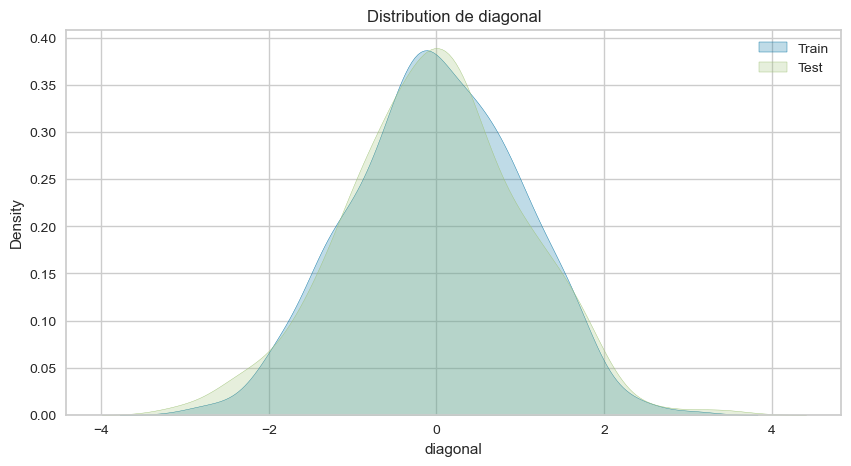

C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_df[col], label='Train', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[col], label='Test', shade=True)


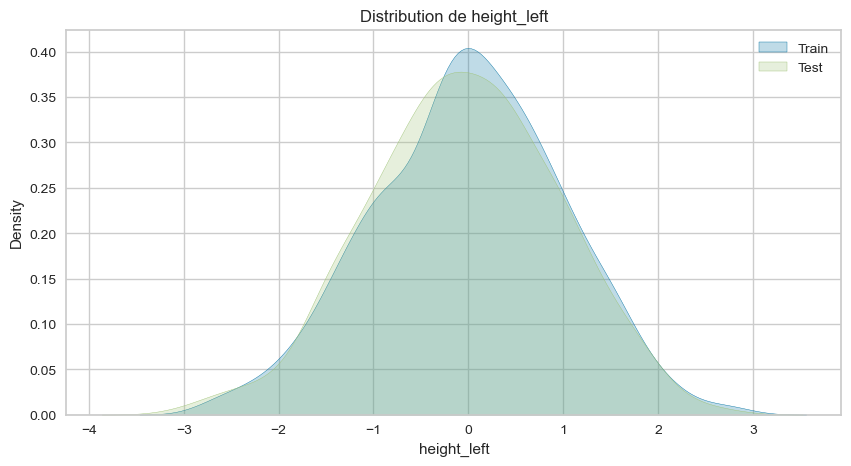

C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_df[col], label='Train', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[col], label='Test', shade=True)


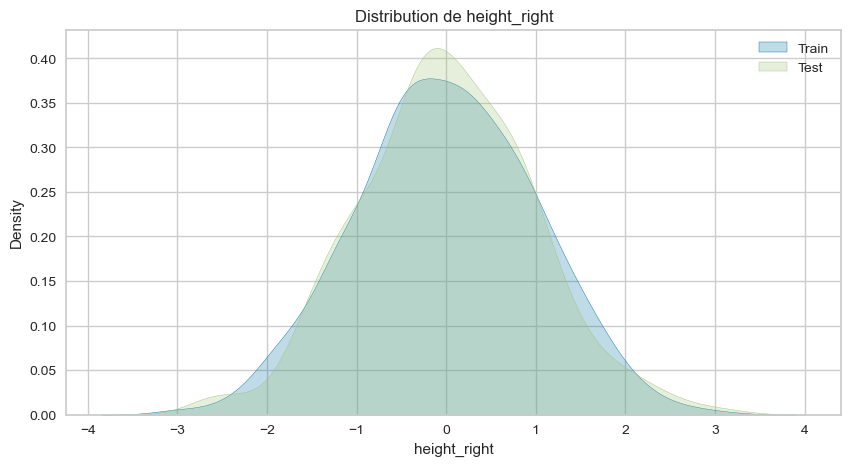

C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_df[col], label='Train', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[col], label='Test', shade=True)


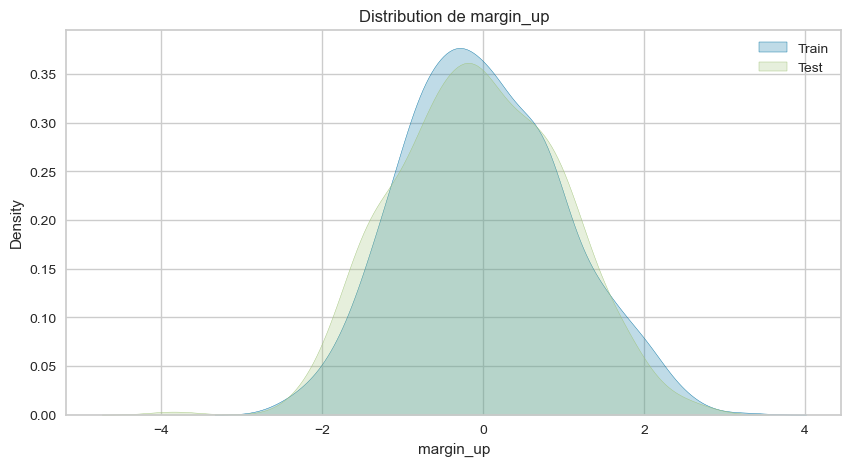

C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_train_df[col], label='Train', shade=True)
C:\Users\DELL\AppData\Local\Temp\ipykernel_16952\257334314.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(X_test_df[col], label='Test', shade=True)


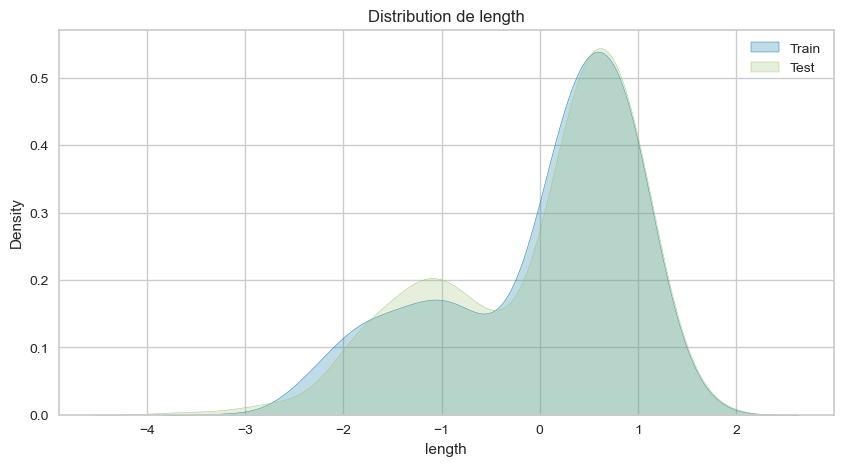

In [22]:
# Convertir les arrays en DataFrames pour une visualisation plus facile
X_train_df = pd.DataFrame(X_train_std, columns=X_train.columns)
X_test_df = pd.DataFrame(X_test_std, columns=X_test.columns)

# Tracer les distributions
for col in X_train_df.columns:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(X_train_df[col], label='Train', shade=True)
    sns.kdeplot(X_test_df[col], label='Test', shade=True)
    plt.title(f'Distribution de {col}')
    plt.legend()
    plt.show()

# 3. Détecter les Valeurs Abérantes (Outliers)

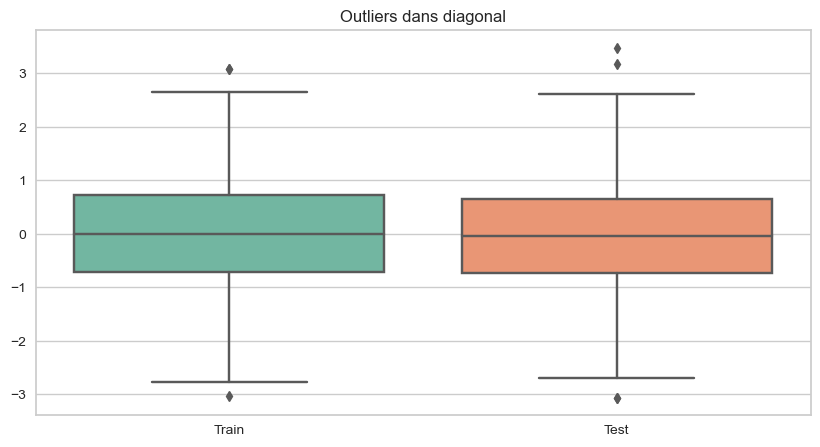

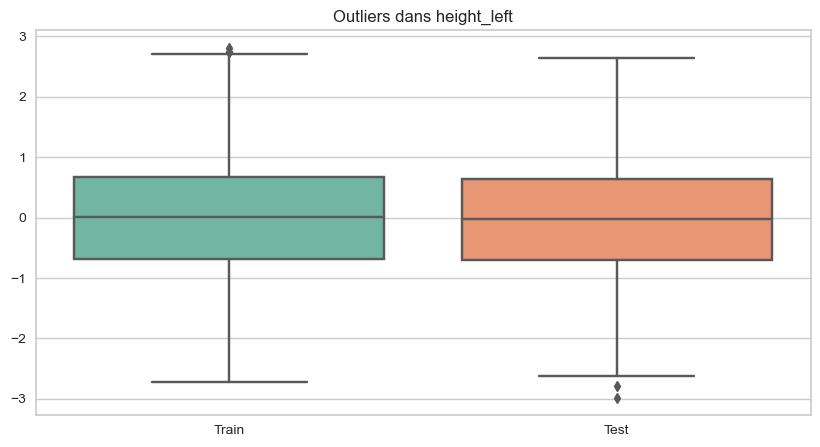

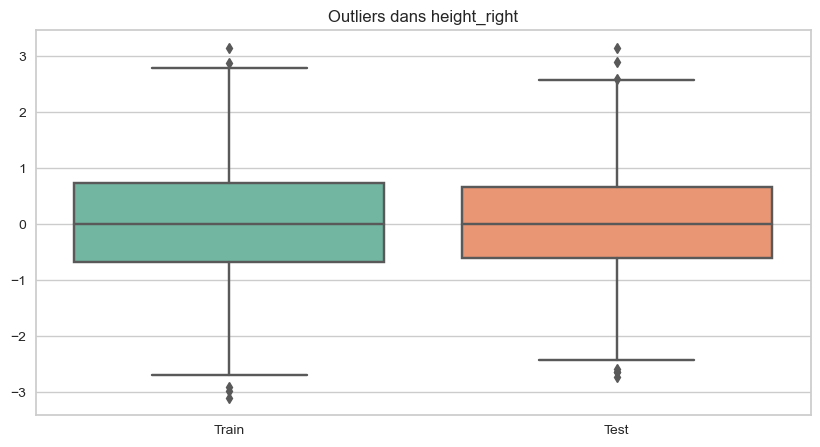

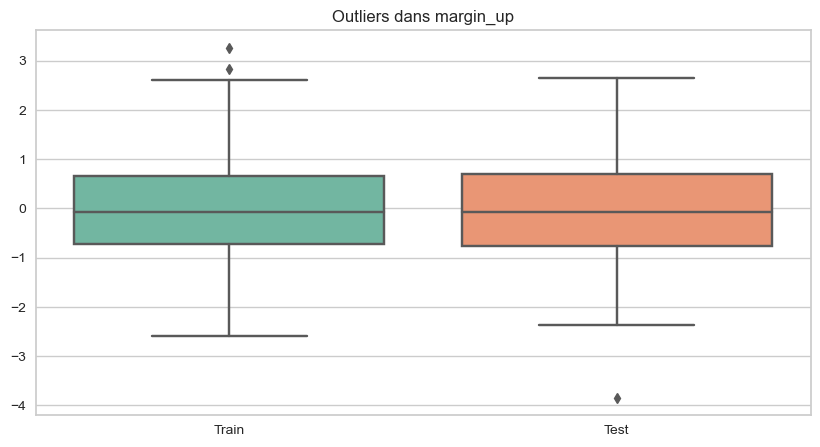

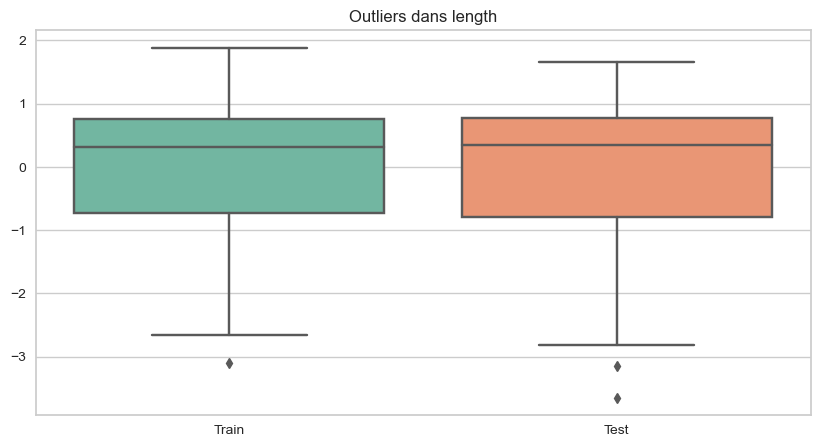

In [23]:
for col in X_train_df.columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(data=[X_train_df[col], X_test_df[col]], palette="Set2")
    plt.xticks([0, 1], ['Train', 'Test'])
    plt.title(f'Outliers dans {col}')
    plt.show()

# 4. Calculer les Statistiques Descriptives

In [24]:
# Calculer les statistiques descriptives
train_stats = X_train_df.describe()
test_stats = X_test_df.describe()

print("Statistiques descriptives pour le jeu d'entraînement:")
print(train_stats)
print("\nStatistiques descriptives pour le jeu de test:")
print(test_stats)

Statistiques descriptives pour le jeu d'entraînement:
           diagonal   height_left  height_right     margin_up        length
count  1.024000e+03  1.024000e+03  1.024000e+03  1.024000e+03  1.024000e+03
mean  -1.272212e-13 -1.526557e-15  1.703152e-14  3.564857e-16  2.862294e-15
std    1.000489e+00  1.000489e+00  1.000489e+00  1.000489e+00  1.000489e+00
min   -3.030330e+00 -2.718062e+00 -3.096393e+00 -2.588439e+00 -3.100547e+00
25%   -7.053947e-01 -6.944951e-01 -6.769649e-01 -7.250201e-01 -7.226474e-01
50%   -7.914122e-03  1.333691e-02 -3.200143e-03 -7.499041e-02  3.144607e-01
75%    7.227799e-01  6.795318e-01  7.318160e-01  6.617099e-01  7.527964e-01
max    3.080929e+00  2.811355e+00  3.151244e+00  3.261829e+00  1.884448e+00

Statistiques descriptives pour le jeu de test:
         diagonal  height_left  height_right   margin_up      length
count  439.000000   439.000000    439.000000  439.000000  439.000000
mean    -0.035302    -0.051765      0.004404   -0.060973   -0.003202
std    

# 5. Calculer et Comparer les Erreurs

En gérant d'abords les valeurs manquantes 

In [25]:
from sklearn.impute import SimpleImputer

# Initialiser l'imputer pour remplacer les NaN par 0
imputer = SimpleImputer(strategy="constant", fill_value=0)

# Imputer les valeurs manquantes dans X_train_std et X_test_std
X_train_std = imputer.fit_transform(X_train_std)
X_test_std = imputer.transform(X_test_std)


In [26]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error

# Entraînez le modèle ElasticNet
model = ElasticNet(fit_intercept=True, alpha=1., l1_ratio=.5)
model.fit(X_train_std, y_train)

# Prédictions et erreurs
y_train_pred = model.predict(X_train_std)
y_test_pred = model.predict(X_test_std)

train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, y_test_pred)

print(f'Erreur sur le jeu d\'entraînement : {train_error}')
print(f'Erreur sur le jeu de test : {test_error}')


Erreur sur le jeu d'entraînement : 0.4460780868530273
Erreur sur le jeu de test : 0.42698000593598173


<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
    <strong>Interprétation:</strong><br>
    Le modèle montre une erreur d'entraînement de 0.446 et une erreur de test de 0.427, très proches l'une de l'autre. Cela suggère que le modèle généralise bien sans surajustement ni sous-ajustement, ce qui est un bon signe de stabilité et de performance sur de nouvelles données.
</div>


<div style="background-color: #d2b48c; color: #ffffff; padding: 15px; border-radius: 8px; font-size: 18px;">
    <h1 style="text-align: center; color: #ffffff;">Exercice 2:</h1>
    <ul style="font-size: 16px; padding-left: 20px;">
        <li>Optimiser les modèles Ridge, Lasso et ElasticNet</li>
        <li>Étudier l'importance des variables dans chaque modèle</li>
    </ul>
</div>


# 1.Optimiser les modéles Ridge,Lasso et ElasticNet

Importation des données

In [6]:
data=pd.read_csv("billets.csv",sep=';')
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


Chargement et préparation des données

In [7]:
X = data.drop('is_genuine', axis=1)
y = data['is_genuine'].astype(int)


Normalisation des données

In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Séparation des données en ensemble d'entraînement et de test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Définir les grilles de paramètres pour chaque modèle

In [10]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
elasticnet_params = {'alpha': [0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}


Instanciation des modèles

In [11]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()


Recherche de grille pour chaque modèle

In [12]:
from sklearn.model_selection import GridSearchCV

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
lasso_grid = GridSearchCV(lasso, lasso_params, cv=5, scoring='r2')
elasticnet_grid = GridSearchCV(elasticnet, elasticnet_params, cv=5, scoring='r2')


Remplacement des valeurs NaN par la moyenne de chaque colonne

In [13]:
from sklearn.impute import SimpleImputer

# Remplacement des valeurs NaN par la moyenne de chaque colonne
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)


In [14]:
# Répétez l'étape de normalisation après l'imputation
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Entraînement et recherche des meilleurs paramètres pour chaque modèle

In [15]:
ridge_grid.fit(X_train, y_train)
lasso_grid.fit(X_train, y_train)
elasticnet_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.9]},
             scoring='r2')

Meilleurs modèles et scores R2

In [16]:
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_
elasticnet_best = elasticnet_grid.best_estimator_

print(f"Best Ridge R2 Score: {ridge_grid.best_score_:.2f} with alpha={ridge_grid.best_params_['alpha']}")
print(f"Best Lasso R2 Score: {lasso_grid.best_score_:.2f} with alpha={lasso_grid.best_params_['alpha']}")
print(f"Best ElasticNet R2 Score: {elasticnet_grid.best_score_:.2f} with alpha={elasticnet_grid.best_params_['alpha']} and l1_ratio={elasticnet_grid.best_params_['l1_ratio']}")


Best Ridge R2 Score: 0.84 with alpha=1
Best Lasso R2 Score: 0.84 with alpha=0.01
Best ElasticNet R2 Score: 0.84 with alpha=0.01 and l1_ratio=0.1


Comparaison des Meilleurs Scores R² et Paramètres Alpha pour les Modèles Ridge, Lasso et ElasticNet

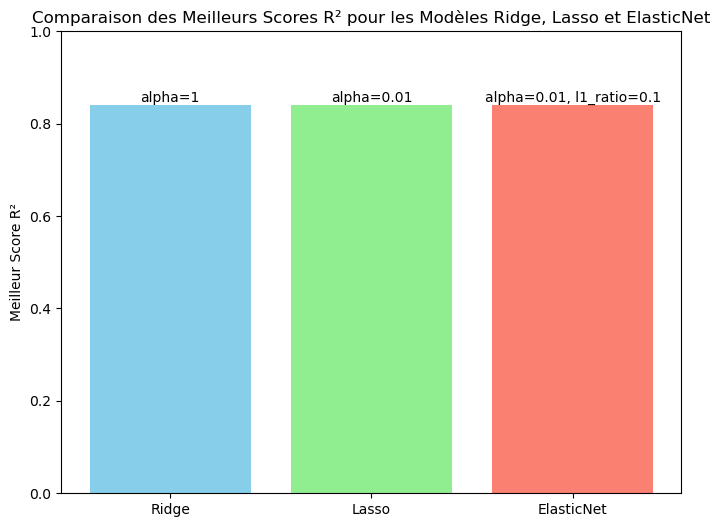

In [2]:
import matplotlib.pyplot as plt

# Modèles et leurs scores R2 avec valeurs alpha
models = ["Ridge", "Lasso", "ElasticNet"]
r2_scores = [0.84, 0.84, 0.84]
alphas = [1, 0.01, 0.01]
l1_ratios = [None, None, 0.1]  # Only applicable for ElasticNet

# Créer le diagramme en barres
fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(models, r2_scores, color=["skyblue", "lightgreen", "salmon"])

# Ajouter les valeurs alpha et l1_ratio au-dessus de chaque barre
for bar, alpha, l1_ratio in zip(bars, alphas, l1_ratios):
    height = bar.get_height()
    if l1_ratio is not None:
        label = f"alpha={alpha}, l1_ratio={l1_ratio}"
    else:
        label = f"alpha={alpha}"
    ax.text(bar.get_x() + bar.get_width() / 2, height, label, ha="center", va="bottom")

# Ajouter des étiquettes et un titre
ax.set_ylabel("Meilleur Score R²")
ax.set_ylim(0, 1)  # Ajuster l'échelle pour une meilleure vue
ax.set_title("Comparaison des Meilleurs Scores R² pour les Modèles Ridge, Lasso et ElasticNet")
plt.show()


# Interprétation:
Les modèles Ridge, Lasso, et ElasticNet atteignent tous un R² de 0,84, indiquant une bonne précision avec différents niveaux de régularisation :

- Ridge avec alpha=1 (régularisation modérée)
- Lasso avec alpha=0.01 (régularisation légère)
- ElasticNet avec alpha=0.01 et l1_ratio=0.1 (combinaison de régularisations).

Meilleurs modéles et MAE

In [17]:
from sklearn.metrics import mean_absolute_error

# Meilleurs modèles pour chaque type de régularisation
ridge_best = ridge_grid.best_estimator_
lasso_best = lasso_grid.best_estimator_
elasticnet_best = elasticnet_grid.best_estimator_

# Calcul du MAE pour chaque modèle
ridge_mae = mean_absolute_error(y_test, ridge_best.predict(X_test))
lasso_mae = mean_absolute_error(y_test, lasso_best.predict(X_test))
elasticnet_mae = mean_absolute_error(y_test, elasticnet_best.predict(X_test))

# Affichage des résultats
print(f"Best Ridge MAE: {ridge_mae:.2f} with alpha={ridge_grid.best_params_['alpha']}")
print(f"Best Lasso MAE: {lasso_mae:.2f} with alpha={lasso_grid.best_params_['alpha']}")
print(f"Best ElasticNet MAE: {elasticnet_mae:.2f} with alpha={elasticnet_grid.best_params_['alpha']} and l1_ratio={elasticnet_grid.best_params_['l1_ratio']}")


Best Ridge MAE: 0.15 with alpha=1
Best Lasso MAE: 0.16 with alpha=0.01
Best ElasticNet MAE: 0.15 with alpha=0.01 and l1_ratio=0.1


Comparaison des Meilleurs Scores MAE et Paramètres Alpha pour les Modèles Ridge, Lasso et ElasticNet

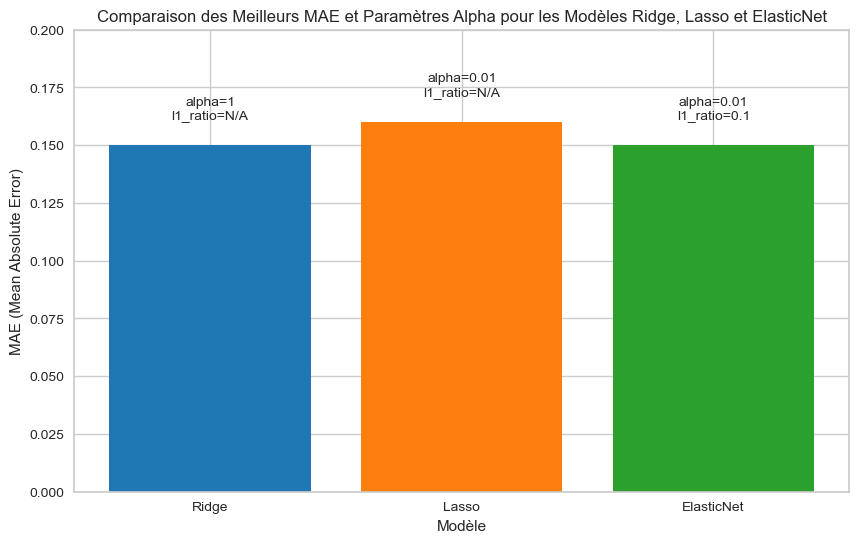

In [19]:
import matplotlib.pyplot as plt

# Données des meilleurs modèles et de leurs MAE
models = ['Ridge', 'Lasso', 'ElasticNet']
mae_scores = [0.15, 0.16, 0.15]
alphas = [1, 0.01, 0.01]
l1_ratios = ["N/A", "N/A", 0.1]  # Pas de l1_ratio pour Ridge et Lasso

# Création du graphique en barres
plt.figure(figsize=(10, 6))
bars = plt.bar(models, mae_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c'])

# Ajout des annotations pour les valeurs alpha et l1_ratio
for bar, alpha, l1_ratio in zip(bars, alphas, l1_ratios):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01,
             f'alpha={alpha}\nl1_ratio={l1_ratio}',
             ha='center', va='bottom', fontsize=10)

# Titre et labels
plt.title("Comparaison des Meilleurs MAE et Paramètres Alpha pour les Modèles Ridge, Lasso et ElasticNet")
plt.xlabel("Modèle")
plt.ylabel("MAE (Mean Absolute Error)")
plt.ylim(0, 0.2)  # Ajustez la limite si nécessaire

# Afficher le graphique
plt.show()


# Interprétation:
Ce graphique montre les meilleurs scores d'erreur absolue moyenne (MAE) pour les modèles de régression Ridge, Lasso et ElasticNet, ainsi que leurs paramètres alpha optimaux. Les modèles Ridge et ElasticNet obtiennent le MAE le plus bas (0,15), indiquant une meilleure précision par rapport au modèle Lasso, dont le MAE est légèrement supérieur (0,16). Cela suggère que Ridge et ElasticNet sont plus performants dans ce contexte, avec une légère flexibilité supplémentaire de la régularisation ElasticNet (alpha=0,01 et l1_ratio=0,1), qui combine les avantages des régularisations L1 et L2.

# 2.Étude de l'importance des variables via les coefficients

In [31]:
ridge_coef = ridge_best.coef_
lasso_coef = lasso_best.coef_
elasticnet_coef = elasticnet_best.coef_


Affichage des coefficient

In [32]:
# Utilisation des noms des colonnes pour afficher les coefficients
feature_names = ['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length']

print("\nImportance des variables pour chaque modèle:")

print("\nRidge Coefficients:")
for feature, coef in zip(feature_names, ridge_best.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nLasso Coefficients:")
for feature, coef in zip(feature_names, lasso_best.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nElasticNet Coefficients:")
for feature, coef in zip(feature_names, elasticnet_best.coef_):
    print(f"{feature}: {coef:.4f}")



Importance des variables pour chaque modèle:

Ridge Coefficients:
diagonal: 0.0179
height_left: -0.0289
height_right: -0.0454
margin_low: -0.1487
margin_up: -0.0783
length: 0.2307

Lasso Coefficients:
diagonal: 0.0084
height_left: -0.0222
height_right: -0.0398
margin_low: -0.1459
margin_up: -0.0735
length: 0.2305

ElasticNet Coefficients:
diagonal: 0.0170
height_left: -0.0285
height_right: -0.0452
margin_low: -0.1483
margin_up: -0.0782
length: 0.2284


Comparaison de l'Importance des Variables dans les Modèles Ridge, Lasso et ElasticNet

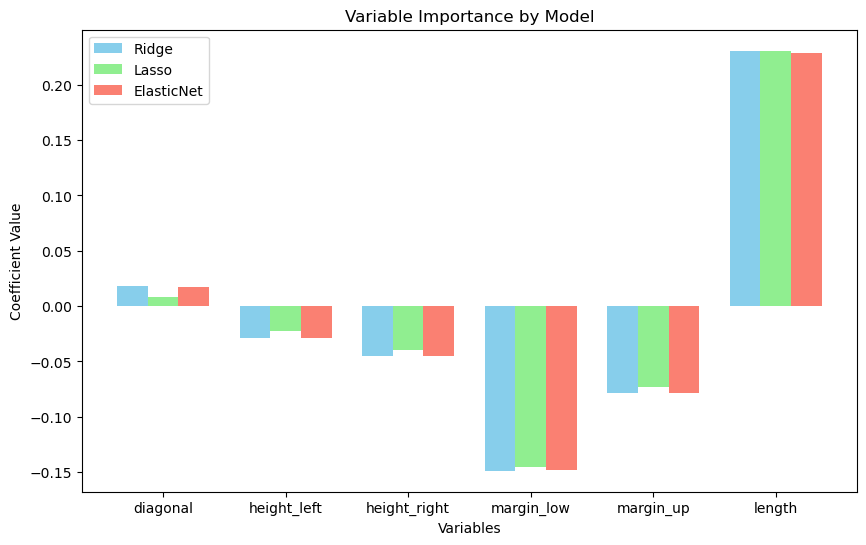

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Variable names and coefficients for each model
variables = ["diagonal", "height_left", "height_right", "margin_low", "margin_up", "length"]

ridge_coefficients = [0.0179, -0.0289, -0.0454, -0.1487, -0.0783, 0.2307]
lasso_coefficients = [0.0084, -0.0222, -0.0398, -0.1459, -0.0735, 0.2305]
elasticnet_coefficients = [0.0170, -0.0285, -0.0452, -0.1483, -0.0782, 0.2284]

# Positioning for each model's bars
x = np.arange(len(variables))
width = 0.25

# Creating the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(x - width, ridge_coefficients, width, label="Ridge", color="skyblue")
ax.bar(x, lasso_coefficients, width, label="Lasso", color="lightgreen")
ax.bar(x + width, elasticnet_coefficients, width, label="ElasticNet", color="salmon")

# Adding labels and title
ax.set_xlabel("Variables")
ax.set_ylabel("Coefficient Value")
ax.set_title("Variable Importance by Model")
ax.set_xticks(x)
ax.set_xticklabels(variables)
ax.legend()

# Displaying the chart
plt.show()


<div style="background-color: #f0f0f0; padding: 10px; border-radius: 5px;">
    <strong>Interprétation:</strong><br>
    Les coefficients des trois modèles montrent que <em>length</em> et <em>margin_low</em> sont les variables les plus influentes, ayant des valeurs de coefficient les plus élevées (positives pour <em>length</em>, négatives pour <em>margin_low</em>). Les autres variables (<em>diagonal</em>, <em>height_left</em>, <em>height_right</em>, <em>margin_up</em>) ont un impact plus faible. Les valeurs similaires entre les modèles indiquent une cohérence dans l'importance des variables pour prédire la cible.
</div>
